In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression as LinearR 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as R2
from scipy.stats import gaussian_kde

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-LRH-22/nat.sus.R1/analysis/literature validation.csv')
data_urban = data[data['Type']=="Urban"]
data_rural = data[data['Type']=="Rural"]

In [3]:
mod_urban = data_urban['Modelled']
obs_urban = data_urban['Observed']

obs_mod_urban = np.vstack([mod_urban, obs_urban])
z_urban = gaussian_kde(obs_mod_urban)(obs_mod_urban)

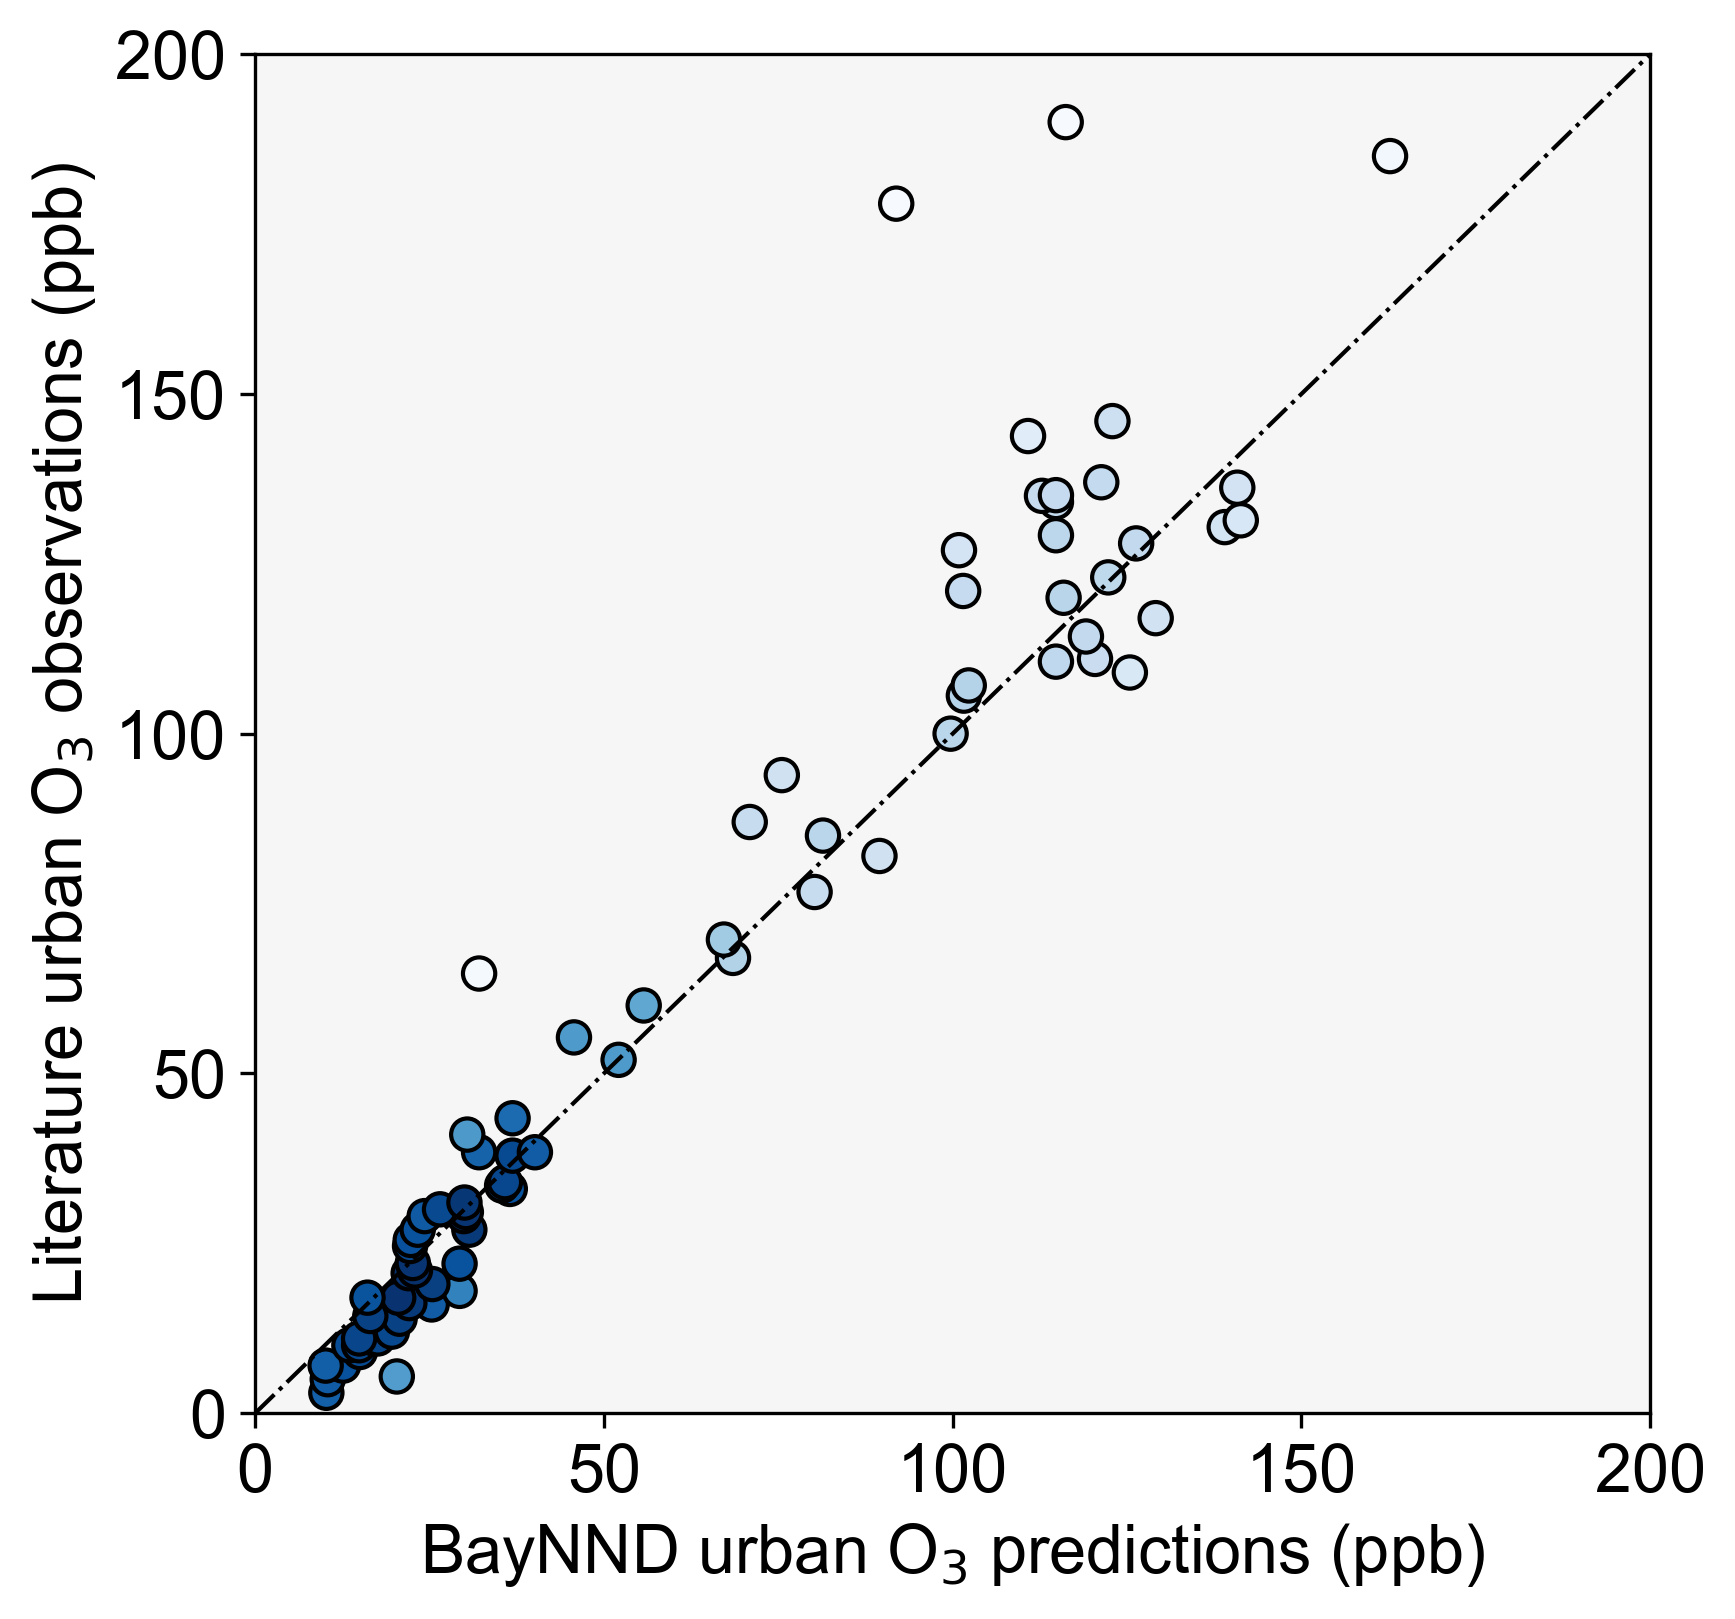

In [4]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize = [6,6], dpi = 300)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='black', lw=1, linestyle='-.')
cax = ax.scatter(mod_urban, obs_urban, c=z_urban, s=60, marker='o', edgecolor='Black', cmap='Blues')

plt.xticks(np.arange(0,201,50), fontsize = 16)
plt.yticks(np.arange(0,201,50), fontsize = 16)
plt.xlim((0,200))
plt.ylim((0,200))

plt.xlabel("BayNND urban O${_3}$ predictions (ppb)", fontsize = 16)
plt.ylabel("Literature urban O${_3}$ observations (ppb)", fontsize = 16)

ax1=plt.gca()
ax1.patch.set_facecolor("gainsboro")       
ax1.patch.set_alpha(0.25)

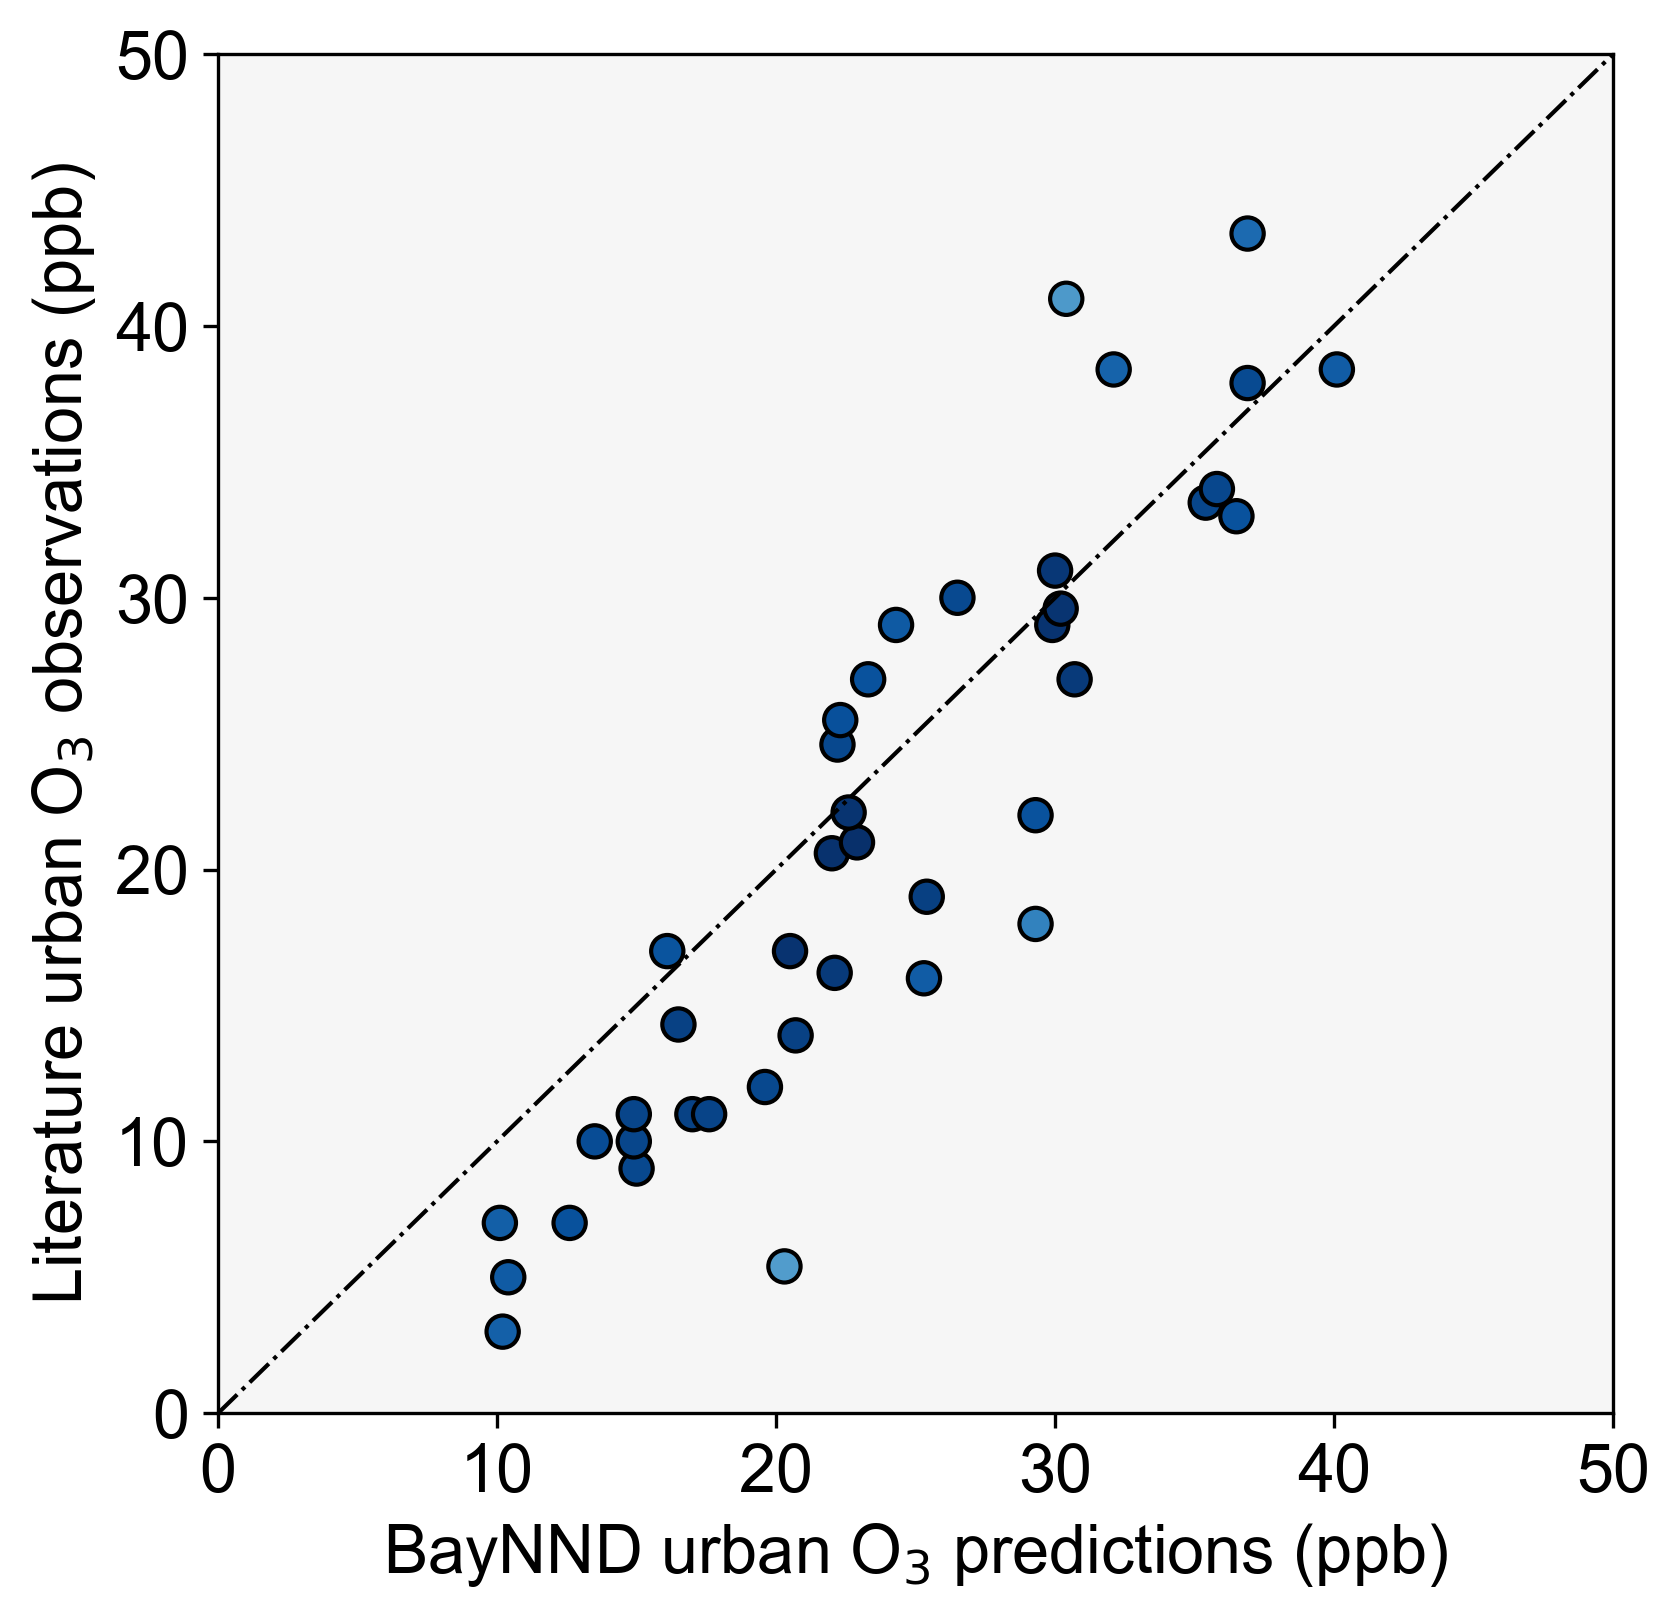

In [5]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize = [6,6], dpi = 300)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='black', lw=1, linestyle='-.')
cax = ax.scatter(mod_urban, obs_urban, c=z_urban, s=60, marker='o', edgecolor='Black', cmap='Blues')

plt.xticks(np.arange(0,51,10), fontsize = 16)
plt.yticks(np.arange(0,51,10), fontsize = 16)
plt.xlim((0,50))
plt.ylim((0,50))

plt.xlabel("BayNND urban O${_3}$ predictions (ppb)", fontsize = 16)
plt.ylabel("Literature urban O${_3}$ observations (ppb)", fontsize = 16)

ax1=plt.gca()
ax1.patch.set_facecolor("gainsboro")       
ax1.patch.set_alpha(0.25)

In [6]:
mod_rural = data_rural['Modelled']
obs_rural = data_rural['Observed']

obs_mod_rural = np.vstack([mod_rural, obs_rural])
z_rural = gaussian_kde(obs_mod_rural)(obs_mod_rural)

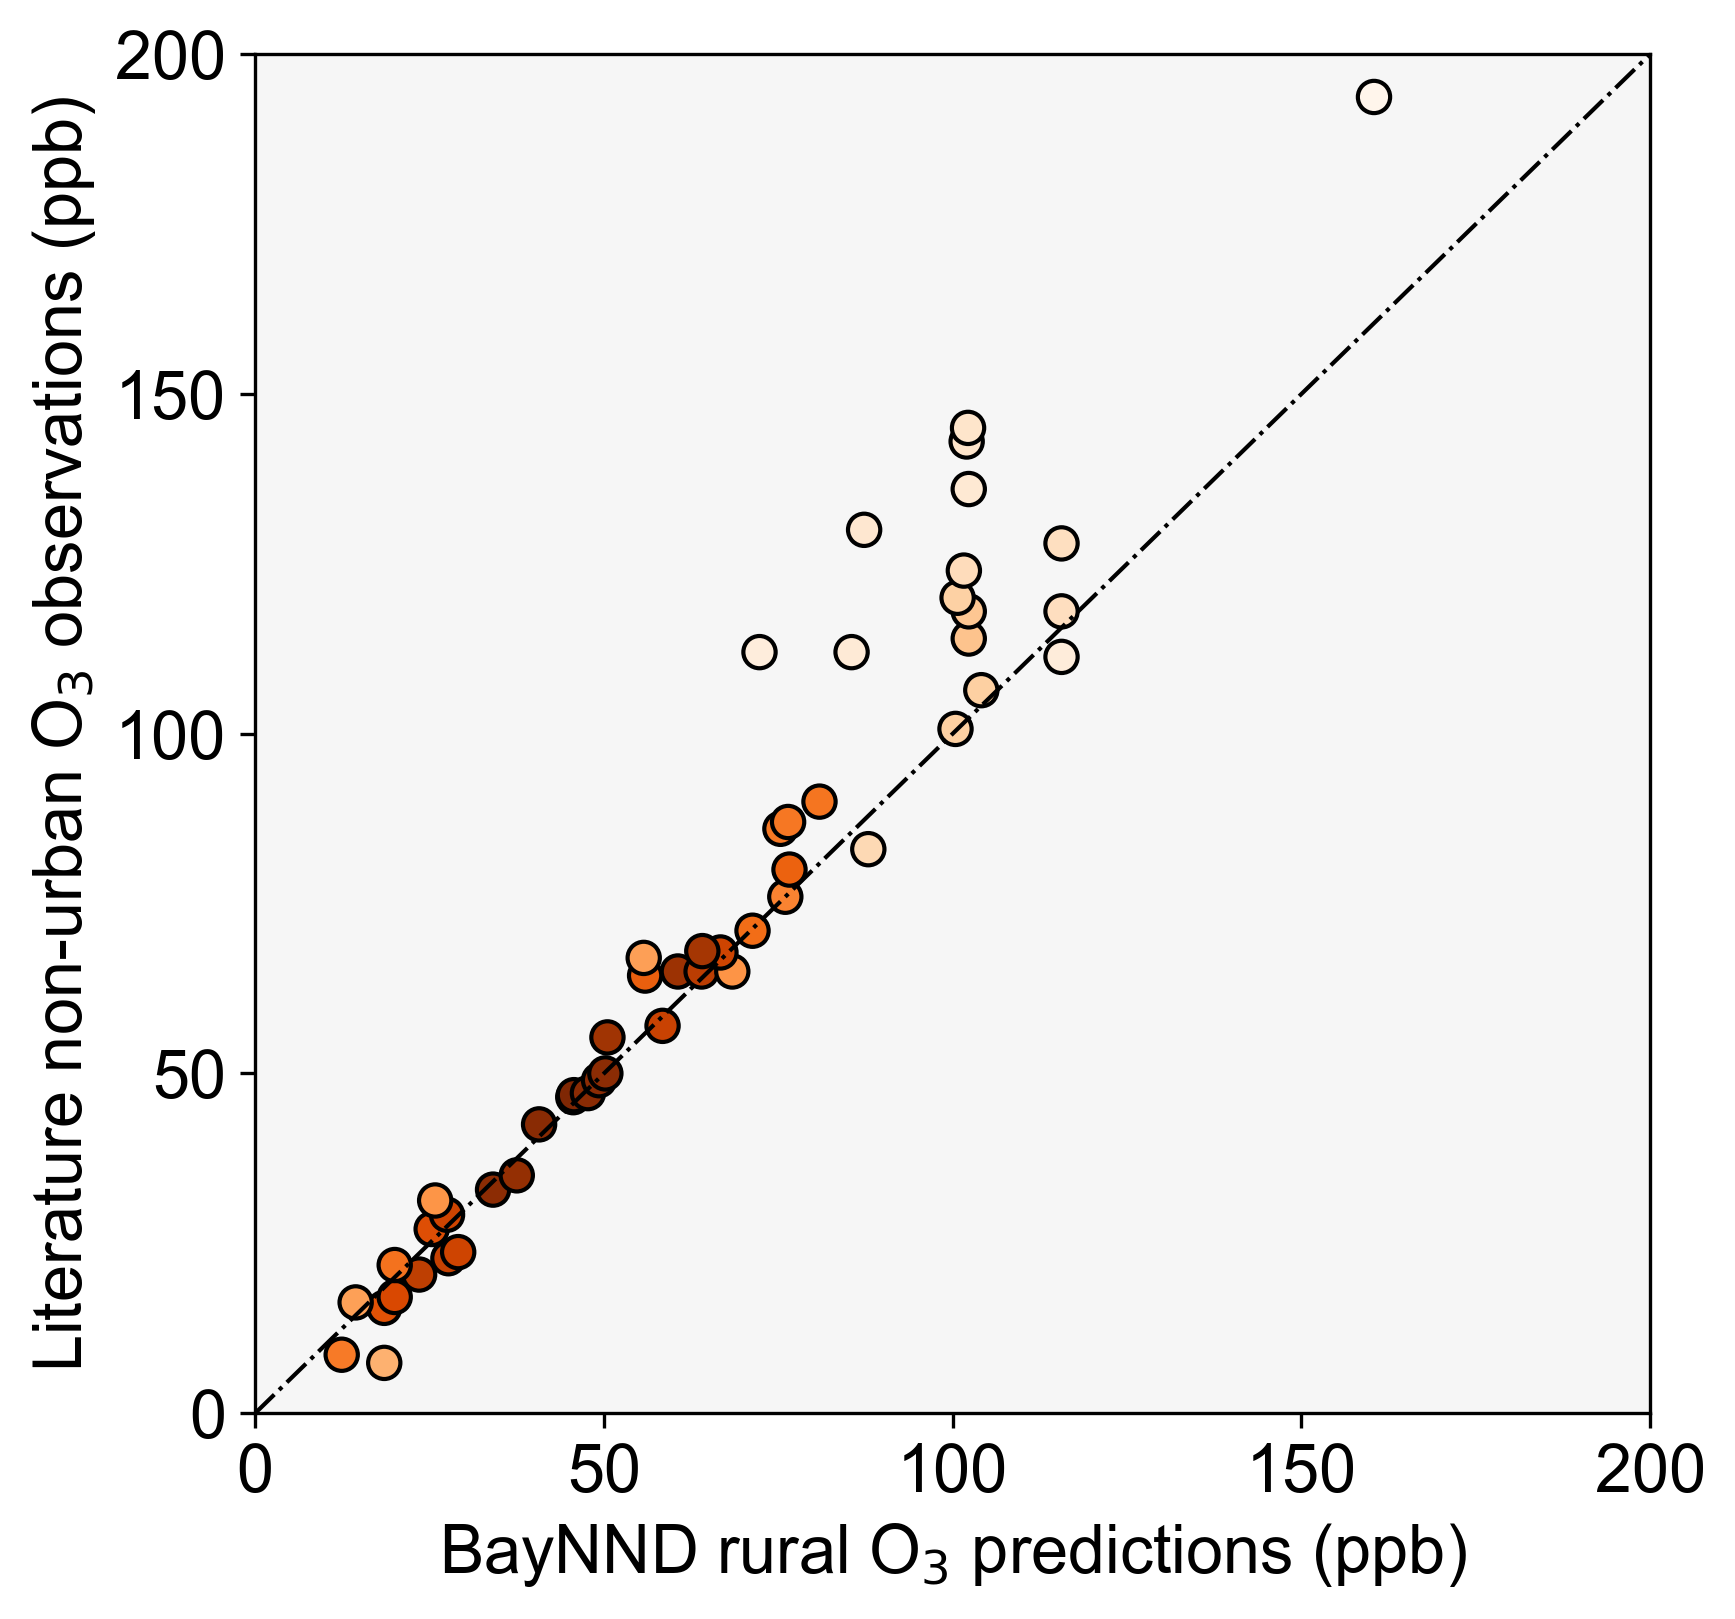

In [7]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize = [6,6], dpi = 300)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='black', lw=1, linestyle='-.')
cax = ax.scatter(mod_rural, obs_rural, c=z_rural, s=60, marker='o', edgecolor='Black', cmap='Oranges')

plt.xticks(np.arange(0,201,50), fontsize = 16)
plt.yticks(np.arange(0,201,50), fontsize = 16)
plt.xlim((0,200))
plt.ylim((0,200))

plt.xlabel("BayNND rural O${_3}$ predictions (ppb)", fontsize = 16)
plt.ylabel("Literature non-urban O${_3}$ observations (ppb)", fontsize = 16)

ax1=plt.gca()
ax1.patch.set_facecolor("gainsboro")       
ax1.patch.set_alpha(0.25)

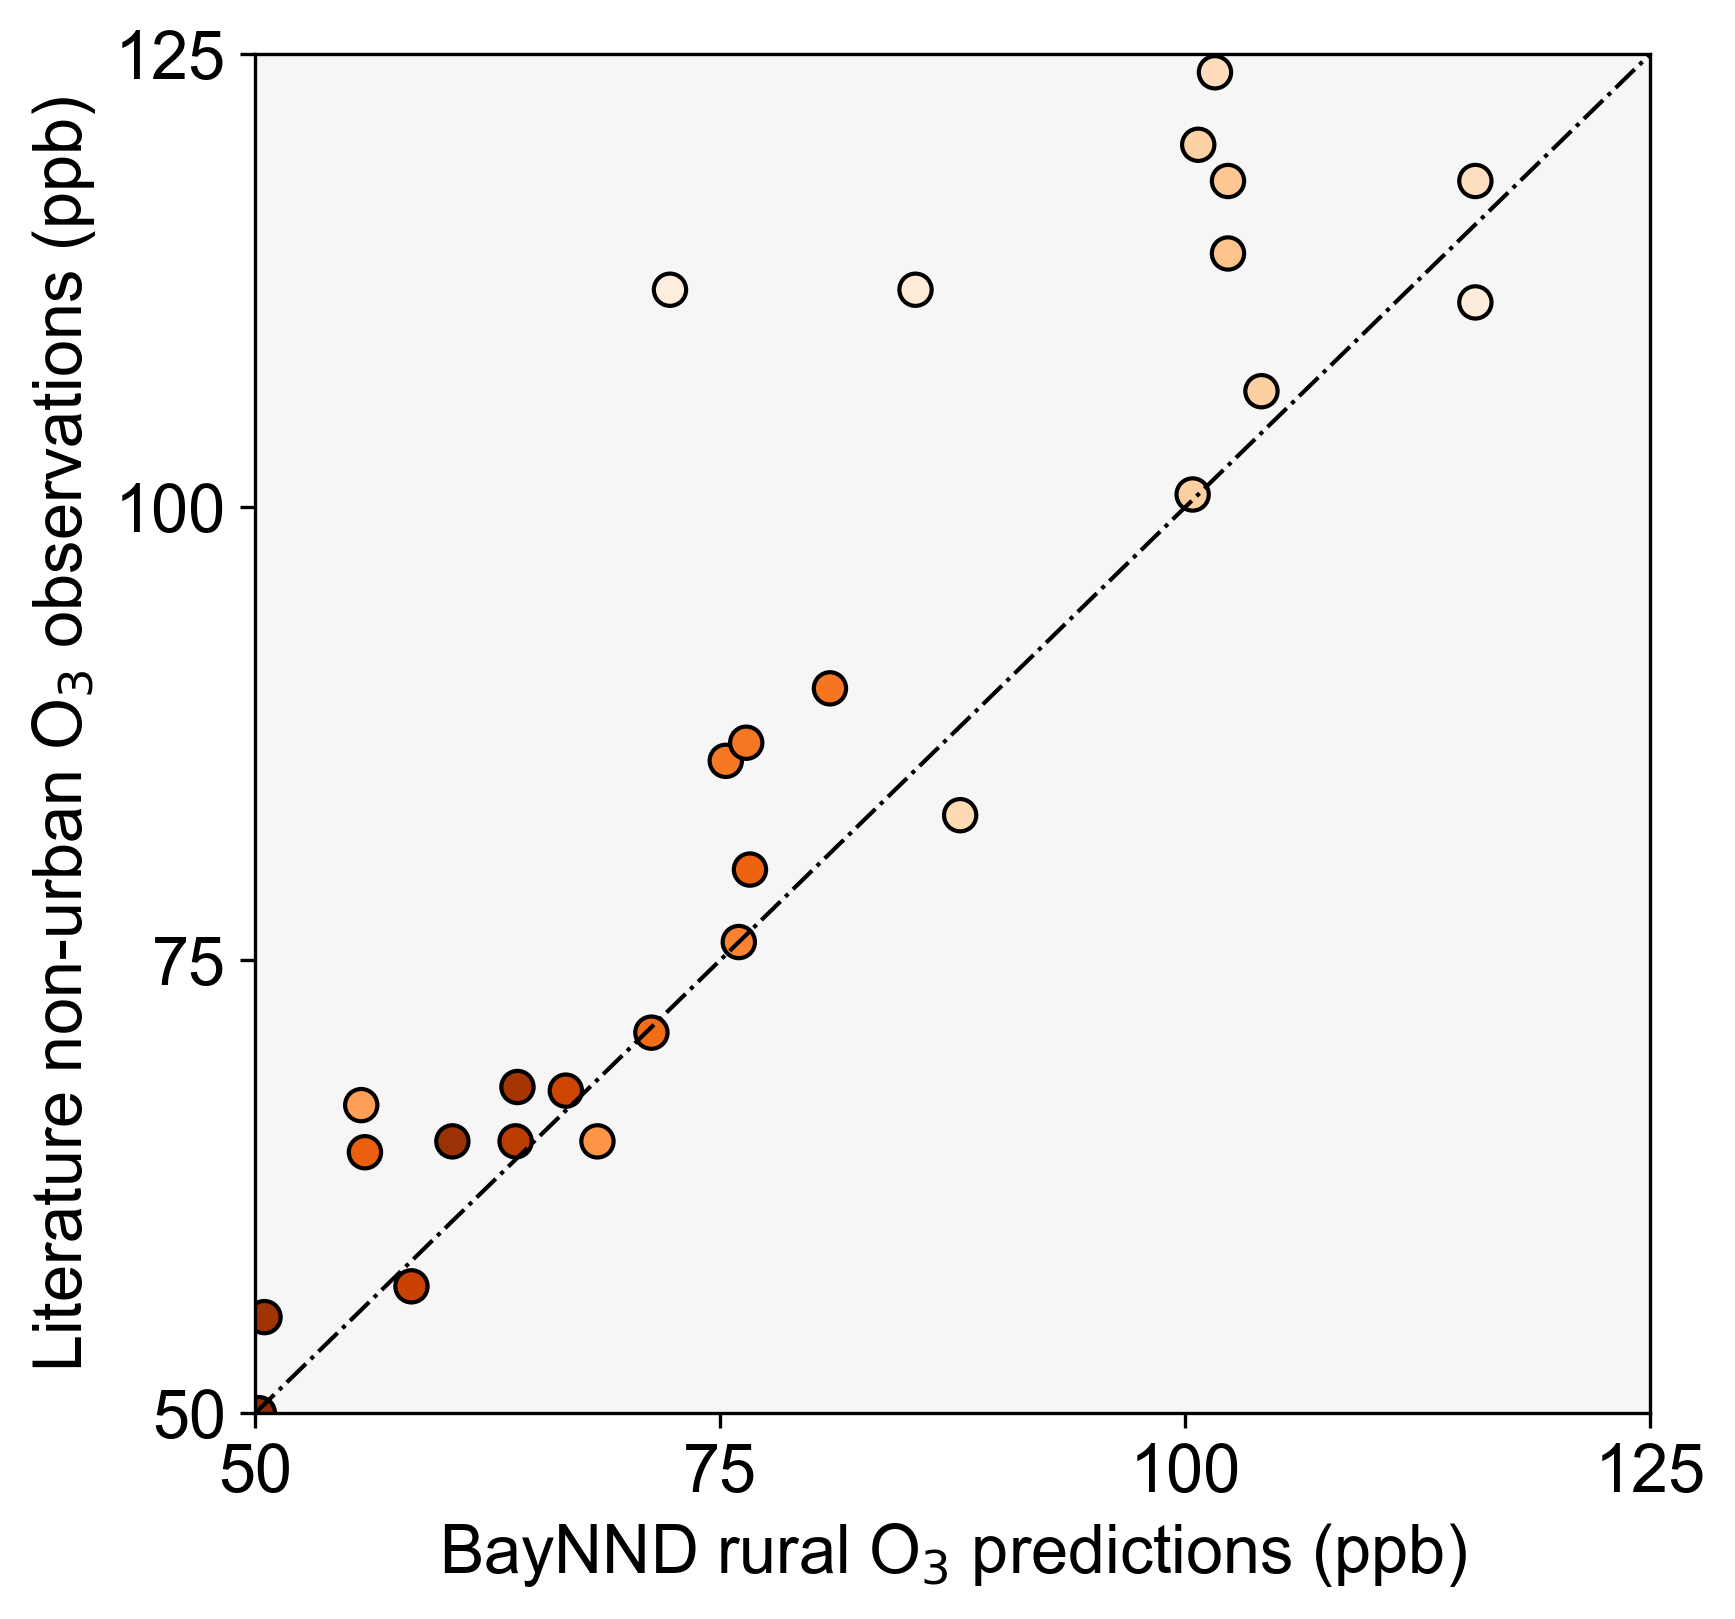

In [8]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize = [6,6], dpi = 300)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='black', lw=1, linestyle='-.')
cax = ax.scatter(mod_rural, obs_rural, c=z_rural, s=60, marker='o', edgecolor='Black', cmap='Oranges')

plt.xticks(np.arange(50,126,25), fontsize = 16)
plt.yticks(np.arange(50,126,25), fontsize = 16)
plt.xlim((50,125))
plt.ylim((50,125))

plt.xlabel("BayNND rural O${_3}$ predictions (ppb)", fontsize = 16)
plt.ylabel("Literature non-urban O${_3}$ observations (ppb)", fontsize = 16)

ax1=plt.gca()
ax1.patch.set_facecolor("gainsboro")       
ax1.patch.set_alpha(0.25)

In [9]:
X = data_urban[['Modelled']]
y = data_urban['Observed']

rsqr = R2(X,y)
rmse = np.sqrt(MSE(X,y))

data_urban['NMB'] = (data_urban['Modelled']-data_urban['Observed'])/data_urban['Observed']
nmb = data_urban['NMB'].mean()

glm = LinearR()
k = glm.fit(X,y).coef_
b = glm.fit(X,y).intercept_
pred = glm.predict(X)
rsqr_adj = R2(pred,y)
rmse_adj = np.sqrt(MSE(pred,y))

rsqr, rmse, nmb, k, b, rsqr_adj, rmse_adj

(0.7111674993271969,
 24.166911682156755,
 0.12593845719133062,
 array([1.17928084]),
 -5.4244189953531645,
 0.826997871313865,
 22.056728181857014)

In [10]:
X = data_rural[['Modelled']]
y = data_rural['Observed']

rsqr = R2(X,y)
rmse = np.sqrt(MSE(X,y))

data_rural['NMB'] = (data_rural['Modelled']-data_rural['Observed'])/data_rural['Observed']
nmb = data_rural['NMB'].median()

glm = LinearR()
k = glm.fit(X,y).coef_
b = glm.fit(X,y).intercept_
pred = glm.predict(X)
rsqr_adj = R2(pred,y)
rmse_adj = np.sqrt(MSE(pred,y))

rsqr, rmse, nmb, k, b, rsqr_adj, rmse_adj

(0.7907831649436484,
 15.312877938820996,
 -0.0424264705882353,
 array([1.23294029]),
 -7.8339966286426375,
 0.9291131112474632,
 10.989641067042683)